In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
from TP06_K_means. src. utils import *

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

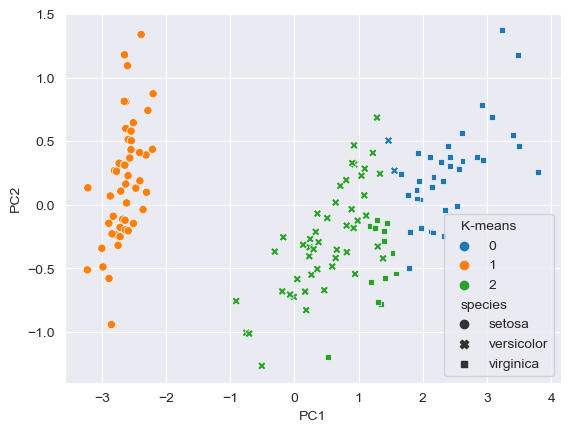

In [8]:
# Q1
iris = sns.load_dataset ("iris")
from sklearn.cluster import KMeans
iris0 = iris.drop(columns=["species"])

# 2,3 groupements
cls = KMeans(n_clusters=3, init="random")
cls. fit(iris0)
labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=iris0, hue=labels, style=iris.species)
plt.show()

In [9]:
# Q2
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
    for n_clusters in n_clusters_list:
        for strategy in strategies:
            for rs in range(tries):
                km = KMeans(n_clusters=n_clusters, init=strategy, n_init=1, random_state=rs)
                km.fit(dataset)
                inertia = km.inertia_
# inertia = KMeans(n_clusters=n_clusters, init=strategy, n_init=1, random_state=rs).fit(dataset).km.inertia_
                yield rs, strategy, n_clusters, inertia

# Example usage
gen = kmeans_dataset(iris0, [3, 5, 10], ["random", "k-means++"], 10)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
df = df.astype({
    "seed": "int32",
    "n_clusters": "int32"
})


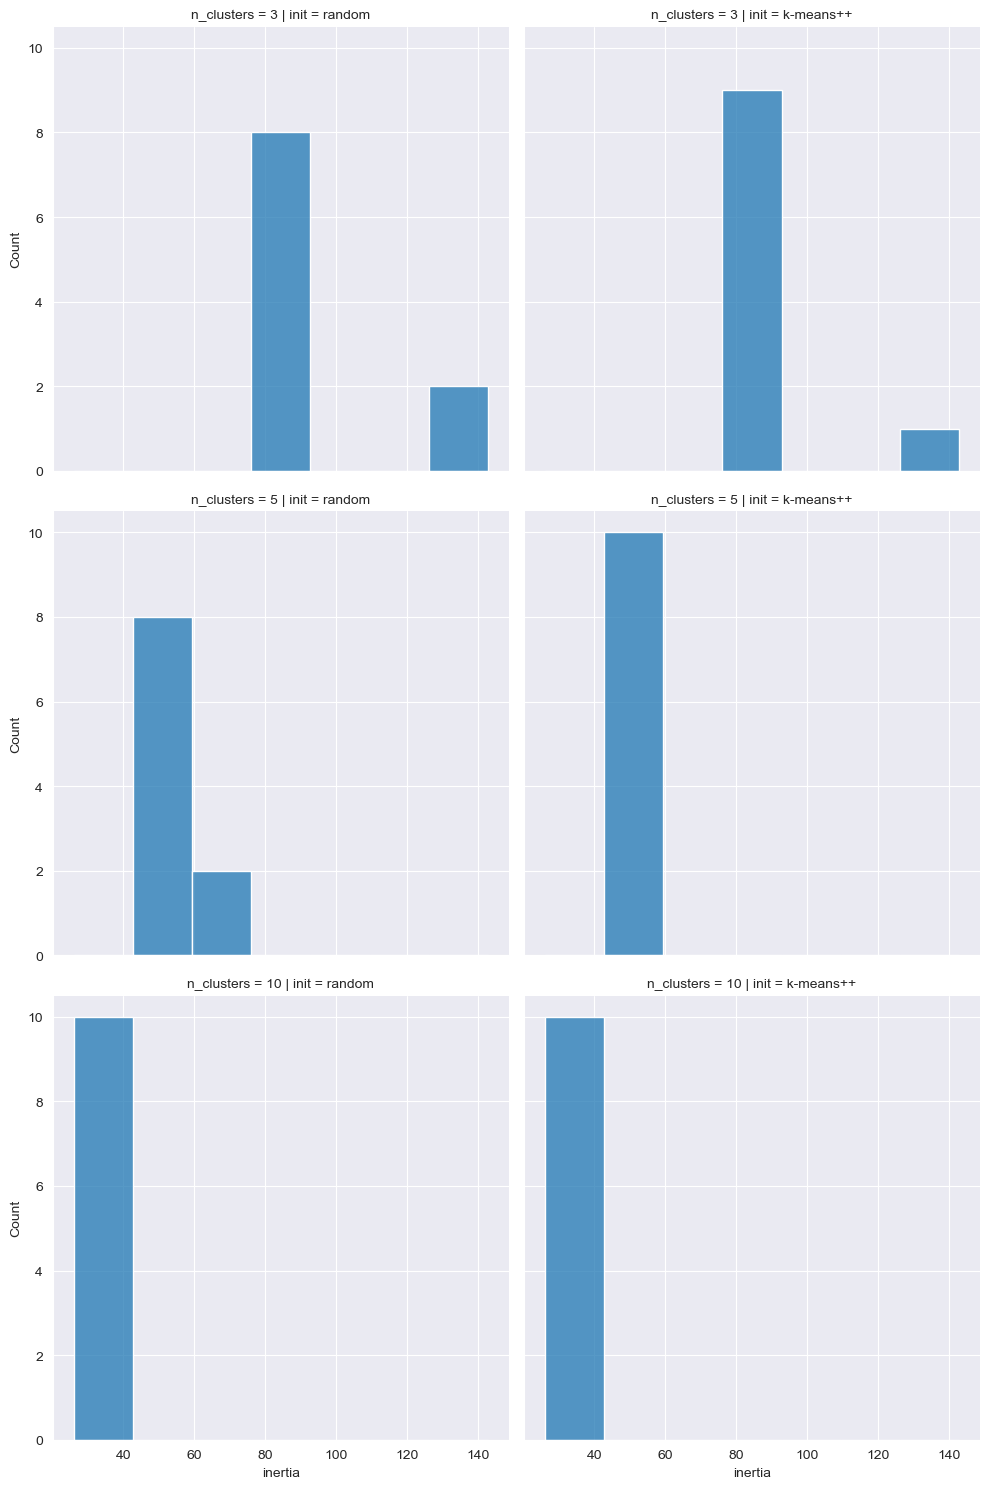

In [10]:
# Q#
sns.displot(df, x="inertia", row="n_clusters", col="init")
plt.show()

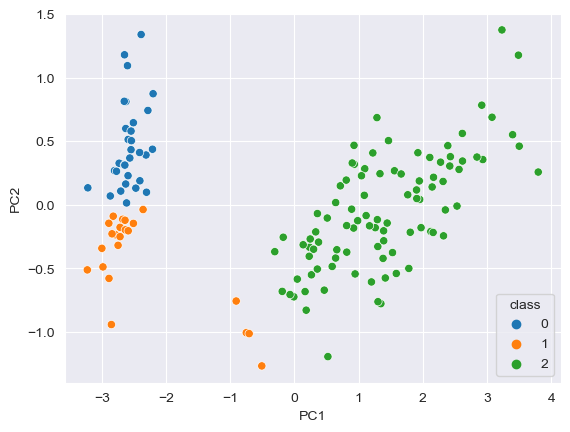

In [11]:
# Q4
df_3r = df.loc[(df.init=="random") & (df.n_clusters==3),:]
bad_seed = df_3r.inertia.idxmax()

cls = KMeans(n_clusters=3, n_init=1,random_state=bad_seed, init="random").fit(iris0)

scatterplot_pca(data=iris0, hue=cls.labels_)
plt.show()

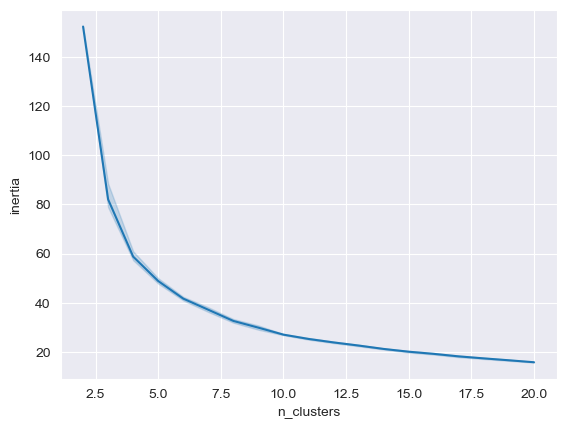

In [12]:
# Q5
gen = kmeans_dataset(iris0, range(2, 21), ["k-means++"], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
sns.lineplot(x="n_clusters", y="inertia", data=df.loc[df.init == "k-means++"])
plt.show()